In [2]:
using DataFrames
using CSV

train = CSV.read("C:/Users/Shobha/Documents/Titanic/v1/data/train.csv")
first(train,7)

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly C:\Users\Shobha\.julia\packages\Gadfly\09PWZ\src\mapping.jl:228


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰,Float64⍰,Int64⍰,Int64⍰,String⍰,Float64⍰,String⍰,String⍰
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [3]:
size(train)

(891, 12)

In [4]:
describe(train)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,PassengerId,446.0,1,446.0,891,,0,Int64
2,Survived,0.383838,0,0.0,1,,0,Int64
3,Pclass,2.30864,1,3.0,3,,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",891,0,String
5,Sex,,female,,male,2,0,String
6,Age,29.6991,0.42,28.0,80.0,,177,Float64
7,SibSp,0.523008,0,0.0,8,,0,Int64
8,Parch,0.381594,0,0.0,6,,0,Int64
9,Ticket,,110152,,WE/P 5735,681,0,String


In [25]:

Pkg.add("StatsBase")
using StatsBase;
countmap(train[:Age])

 Resolving package versions...
  Updating `C:\Users\Shobha\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\Shobha\.julia\environments\v1.0\Manifest.toml`
 [no changes]


Dict{Union{Missing, Float64},Int64} with 89 entries:
  70.5 => 1
  2.0  => 10
  34.5 => 1
  11.0 => 4
  39.0 => 14
  46.0 => 3
  25.0 => 23
  55.0 => 2
  66.0 => 1
  42.0 => 13
  58.0 => 5
  29.0 => 20
  59.0 => 2
  8.0  => 4
  0.67 => 1
  74.0 => 1
  23.5 => 1
  0.83 => 2
  57.0 => 2
  20.0 => 15
  24.5 => 1
  14.0 => 6
  31.0 => 17
  70.0 => 2
  33.0 => 15
  ⋮    => ⋮

In [29]:
using Statistics
train[ismissing.(train[:Age]),:Age]=mean(train[.!ismissing.(train[:Age]),:Age])

29.699117647058763

In [30]:
countmap(train[ismissing.(train[:Age]),:Age])

Dict{Union{Missing, Float64},Int64} with 0 entries

In [31]:
countmap(train[:Age])

Dict{Union{Missing, Float64},Int64} with 89 entries:
  70.5 => 1
  2.0  => 10
  34.5 => 1
  11.0 => 4
  39.0 => 14
  46.0 => 3
  25.0 => 23
  55.0 => 2
  66.0 => 1
  42.0 => 13
  58.0 => 5
  29.0 => 20
  59.0 => 2
  8.0  => 4
  0.67 => 1
  74.0 => 1
  23.5 => 1
  0.83 => 2
  57.0 => 2
  20.0 => 15
  24.5 => 1
  14.0 => 6
  31.0 => 17
  70.0 => 2
  33.0 => 15
  ⋮    => ⋮

In [32]:
train[:Child] = 1
train[ismissing.(train[:Age]), :Child] = 1 #this can be avoided. Its just an explicit way to demonstrate the rule
train[train[:Age] .< 18, :Child] = 1 #same applies for this, as all Child fields are 1 by default except when Age >= 18
train[train[:Age] .>= 18, :Child] = 0
head(train)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[32]:5
└ @ Core In[32]:5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰,Float64⍰,Int64⍰,Int64⍰,String⍰,Float64⍰,String⍰,String⍰,Int64
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S,0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,0
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S,0
6,6,0,3,"Moran, Mr. James",male,29.6991,0,0,330877,8.4583,missing,Q,0


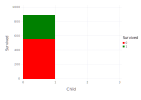

In [36]:
plot(train, x="Child", y="Survived", color="Survived", Geom.histogram(position=:stack), Scale.color_discrete_manual("red","green"))

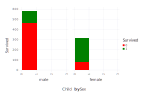

In [47]:
plot(train, xgroup="Sex", x="Child", y="Survived", color="Survived", Geom.subplot_grid(Geom.histogram(position=:stack)), Scale.color_discrete_manual("red","green"))

In [49]:
countmap(train[:Embarked])
train[ismissing.(train[:Embarked]), :Embarked] = "S"


"S"

In [50]:
countmap(train[:Embarked])

Dict{Union{Missing, String},Int64} with 3 entries:
  "Q" => 77
  "S" => 646
  "C" => 168

In [68]:
Pkg.add("DecisionTree");
using DecisionTree

features = convert(Matrix,train[:,[:Pclass, :Sex, :Age, :SibSp, :Parch, :Fare, :Embarked, :Child]])
#labels=Array(train[:Survived])
labels = Array{Float32}(train[:Survived])

 Resolving package versions...
  Updating `C:\Users\Shobha\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\Shobha\.julia\environments\v1.0\Manifest.toml`
 [no changes]


891-element Array{Float32,1}:
 0.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 ⋮  
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0

In [69]:
stump = build_stump(labels, features)
print_tree(stump)

Feature 2, Threshold male
L-> 1.0 : 233/314
R-> 0.0 : 468/577


In [70]:
predictions = apply_tree(stump, features)
confusion_matrix(labels, predictions)

2×2 Array{Int64,2}:
 468   81
 109  233

Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.7867564534231201
Kappa:    0.5421129503407983

In [71]:
model = build_tree(labels, features)
print_tree(model, 5)
length(model)

Feature 2, Threshold male
L-> Feature 1, Threshold 2.5
    L-> Feature 6, Threshold 28.85625
        L-> Feature 6, Threshold 28.23125
            L-> Feature 3, Threshold 23.5
                L-> 1.0 : 15/15
                R-> 
            R-> 0.0 : 1/1
        R-> Feature 3, Threshold 2.5
            L-> 0.0 : 1/1
            R-> Feature 5, Threshold 1.5
                L-> 1.0 : 84/84
                R-> 
    R-> Feature 6, Threshold 23.35
        L-> Feature 3, Threshold 36.5
            L-> Feature 7, Threshold S
                L-> 
                R-> 
            R-> Feature 3, Threshold 55.0
                L-> 0.0 : 6/6
                R-> 1.0 : 1/1
        R-> Feature 5, Threshold 0.5
            L-> 1.0 : 1/1
            R-> Feature 6, Threshold 31.331249999999997
                L-> 0.0 : 15/15
                R-> 
R-> Feature 6, Threshold 26.26875
    L-> Feature 3, Threshold 13.5
        L-> Feature 4, Threshold 2.0
            L-> Feature 5, Threshold 0.5
             

206

In [72]:
# prune tree: merge leaves having >= 70% combined purity (default: 100%)
model = prune_tree(model, 0.7)
# pretty print of the tree, to a depth of 5 nodes (optional)
print_tree(model, 5)
length(model)

Feature 2, Threshold male
L-> Feature 1, Threshold 2.5
    L-> Feature 6, Threshold 28.85625
        L-> Feature 6, Threshold 28.23125
            L-> Feature 3, Threshold 23.5
                L-> 1.0 : 15/15
                R-> 
            R-> 0.0 : 1/1
        R-> 1.0 : 98/100
    R-> Feature 6, Threshold 23.35
        L-> Feature 3, Threshold 36.5
            L-> Feature 7, Threshold S
                L-> 
                R-> 
            R-> 0.0 : 6/7
        R-> 0.0 : 24/27
R-> Feature 6, Threshold 26.26875
    L-> Feature 3, Threshold 13.5
        L-> Feature 4, Threshold 2.0
            L-> Feature 5, Threshold 0.5
                L-> 
                R-> 1.0 : 12/12
            R-> 0.0 : 1/1
        R-> Feature 7, Threshold Q
            L-> Feature 6, Threshold 15.1479
                L-> 
                R-> 
            R-> Feature 6, Threshold 13.25
                L-> 
                R-> 0.0 : 62/64
    R-> Feature 4, Threshold 2.5
        L-> Feature 3, Threshold 13.5
 

166

In [84]:
purities = [i for i in range(0.1,stop= 1.0,length= 8)]

8-element Array{Float64,1}:
 0.1                
 0.22857142857142856
 0.35714285714285715
 0.4857142857142857 
 0.6142857142857143 
 0.7428571428571429 
 0.8714285714285714 
 1.0                

2×2 Array{Int64,2}:
 71  0
 40  0

2×2 Array{Int64,2}:
 78  0
 33  0

2×2 Array{Int64,2}:
 71  0
 40  0


Fold 1
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6396396396396397
Kappa:    0.0

Fold 2
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.7027027027027027
Kappa:    0.0

Fold 3
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6396396396396397
Kappa:    0.0

Fold 4
Classes:  Float32[0.0, 1.0

2×2 Array{Int64,2}:
 68  0
 43  0

2×2 Array{Int64,2}:
 68  0
 43  0

]
Matrix:   
Accuracy: 0.6126126126126126
Kappa:    0.0

Fold 5
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6126126126126126
Kappa:    0.0

Fold 6
Classes:  Float32[

2×2 Array{Int64,2}:
 58  0
 53  0

2×2 Array{Int64,2}:
 74  0
 37  0

2×2 Array{Int64,2}:
 59  0
 52  0

0.0, 1.0]
Matrix:   
Accuracy: 0.5225225225225225
Kappa:    0.0

Fold 7
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6666666666666666
Kappa:    0.0

Fold 8
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5315315315315315
Kappa:    0.0

Mean Accuracy: 0.6159909909909911


2×2 Array{Int64,2}:
 66  0
 45  0

2×2 Array{Int64,2}:
 69  0
 42  0

2×2 Array{Int64,2}:
 69  0
 42  0

2×2 Array{Int64,2}:
 77  0
 34  0


Fold 1
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5945945945945946
Kappa:    0.0

Fold 2
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6216216216216216
Kappa:    0.0

Fold 3
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6216216216216216
Kappa:    0.0

Fold 4
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6936936936936937
Kappa:    0.0


2×2 Array{Int64,2}:
 65  0
 46  0

2×2 Array{Int64,2}:
 61  0
 50  0

2×2 Array{Int64,2}:
 77  0
 34  0


Fold 5
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5855855855855856
Kappa:    0.0

Fold 6
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5495495495495496
Kappa:    0.0

Fold 7
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6936936936936937
Kappa:    0.0

2×2 Array{Int64,2}:
 63  0
 48  0

2×2 Array{Int64,2}:
 71  0
 40  0

2×2 Array{Int64,2}:
 62  0
 49  0

2×2 Array{Int64,2}:
 61  0
 50  0



Fold 8
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5675675675675675
Kappa:    0.0

Mean Accuracy: 0.615990990990991

Fold 1
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6396396396396397
Kappa:    0.0

Fold 2
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5585585585585585
Kappa:    0.0

Fold 3
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.

2×2 Array{Int64,2}:
 71  0
 40  0

5495495495495496
Kappa:    0.0

Fold 4
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6396396396396397
Kappa:    0.0

Fold 5
Classes:  Float32[0.0, 

2×2 Array{Int64,2}:
 75  0
 36  0

2×2 Array{Int64,2}:
 65  0
 46  0

2×2 Array{Int64,2}:
 79  0
 32  0

2×2 Array{Int64,2}:
 64  0
 47  0

2×2 Array{Int64,2}:
 74  0
 37  0

1.0]
Matrix:   
Accuracy: 0.6756756756756757
Kappa:    0.0

Fold 6
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5855855855855856
Kappa:    0.0

Fold 7
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.7117117117117117
Kappa:    0.0

Fold 8
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5765765765765766
Kappa:    0.0

Mean Accuracy: 0.6171171171171171

Fold 1
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6666666666666666
Kappa:    0.0


2×2 Array{Int64,2}:
 66  0
 45  0

2×2 Array{Int64,2}:
 75  0
 36  0

2×2 Array{Int64,2}:
 69  0
 42  0

2×2 Array{Int64,2}:
 61  0
 50  0

2×2 Array{Int64,2}:
 66  0
 45  0


Fold 2
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5945945945945946
Kappa:    0.0

Fold 3
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6756756756756757
Kappa:    0.0

Fold 4
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6216216216216216
Kappa:    0.0

Fold 5
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5495495495495496
Kappa:    0.0

Fold 6
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.5945945945945946
Kappa:    0.0


2×2 Array{Int64,2}:
 69  0
 42  0

2×2 Array{Int64,2}:
 68  0
 43  0

2×2 Array{Int64,2}:
 76   0
  7  28

2×2 Array{Int64,2}:
 59   6
  1  45


Fold 7
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6216216216216216
Kappa:    0.0

Fold 8
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.6126126126126126
Kappa:    0.0

Mean Accuracy: 0.6171171171171171

Fold 1
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9369369369369369
Kappa:    0.8456189151599444

Fold 2
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9369369369369369
Kappa:    0.8720987654320987


2×2 Array{Int64,2}:
 63   4
  4  40

2×2 Array{Int64,2}:
 63   2
  1  45

2×2 Array{Int64,2}:
 67   7
  5  32


Fold 3
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9279279279279279
Kappa:    0.8493894165535956

Fold 4
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.972972972972973
Kappa:    0.9444907484580765

Fold 5
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.8918918918918919
Kappa:    0.76

Fold 

2×2 Array{Int64,2}:
 64   4
  4  39

2×2 Array{Int64,2}:
 67   0
  1  43

2×2 Array{Int64,2}:
 60   5
  3  43

6
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9279279279279279
Kappa:    0.8481532147742817

Fold 7
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.990990990990991
Kappa:    0.9810999489187808

Fold 8
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9279279279279279
Kappa:    0.8524426719840478

Mean Accuracy: 0.9391891891891891

Fold 1
Classes:  Float32[0.0

2×2 Array{Int64,2}:
 72   0
  2  37

2×2 Array{Int64,2}:
 71   1
  4  35

2×2 Array{Int64,2}:
 65   1
  2  43

2×2 Array{Int64,2}:
 60   0
  4  47

, 1.0]
Matrix:   
Accuracy: 0.9819819819819819
Kappa:    0.96

Fold 2
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.954954954954955
Kappa:    0.8994018488308864

Fold 3
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.972972972972973
Kappa:    0.9437404967055247

Fold 4
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.963963963963964
Kappa:    0.9270216962524656


2×2 Array{Int64,2}:
 74   2
  4  31

2×2 Array{Int64,2}:
 68   1
  3  39

2×2 Array{Int64,2}:
 61   1
  6  43


Fold 5
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9459459459459459
Kappa:    0.872852233676976

Fold 6
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.963963963963964
Kappa:    0.9226750261233021

Fold 7
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9369369369369369
Kappa:    0.8707369821993013


2×2 Array{Int64,2}:
 69   2
  1  39

2×2 Array{Int64,2}:
 71   0
  4  36


Fold 8
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.972972972972973
Kappa:    0.9416914725967432

Mean Accuracy: 0.9617117117117118

Fold 1
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.963963963963964
Kappa:    0.920086393088553

Fold 2

2×2 Array{Int64,2}:
 61   0
  3  47

2×2 Array{Int64,2}:
 67   1
  3  40


Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.972972972972973
Kappa:    0.9451129058842922

Fold 3
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.963963963963964
Kappa:    0.9234218696102104

Fold 4


2×2 Array{Int64,2}:
 68   0
  0  43

2×2 Array{Int64,2}:
 76   0
  0  35

2×2 Array{Int64,2}:
 68   0
  1  42

Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 1.0
Kappa:    1.0

Fold 5
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 1.0
Kappa:    1.0

Fold 6
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.990990990990991
Kappa:    0.9809376609994848

2×2 Array{Int64,2}:
 73   0
  2  36

2×2 Array{Int64,2}:
 62   1
  3  45

2×2 Array{Int64,2}:
 74   0
  1  36



Fold 7
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9819819819819819
Kappa:    0.9594742606790799

Fold 8
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.963963963963964
Kappa:    0.9262213359920239

Mean Accuracy: 0.9797297297297297

Fold 1
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.990990990990991
Kappa:    0.9795918367346939


2×2 Array{Int64,2}:
 70   0
  1  40

2×2 Array{Int64,2}:
 65   0
  2  44

2×2 Array{Int64,2}:
 68   0
  2  41

2×2 Array{Int64,2}:
 72   0
  2  37

2×2 Array{Int64,2}:
 69   0
  2  40


Fold 2
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.990990990990991
Kappa:    0.9805638241989143

Fold 3
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9819819819819819
Kappa:    0.9626388421406933

Fold 4
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9819819819819819
Kappa:    0.9617109348051052

Fold 5
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9819819819819819
Kappa:    0.96

Fold 6
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.9819819819819819
Kappa:    0.9613375130616509


2×2 Array{Int64,2}:
 60   2
  3  46

2×2 Array{Int64,2}:
 68   0
  1  42


Fold 7
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.954954954954955
Kappa:    0.9084611578426522

Fold 8
Classes:  Float32[0.0, 1.0]
Matrix:   
Accuracy: 0.990990990990991
Kappa:    0.9809376609994848

Mean Accuracy: 0.9819819819819819


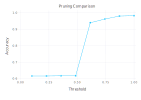

In [85]:
# run n-fold cross validation for pruned tree,

accuracies = zeros(length(purities))

for i in 1:length(purities)
    accuracies[i] = mean(nfoldCV_tree(labels, features, 8 ,purities[i]))
end

plot(x=purities, y=accuracies, Geom.point, Geom.line, Guide.xlabel("Threshold"), Guide.ylabel("Accuracy"), Guide.title("Pruning Comparison"))
